# **Principal Component Analysis (PCA) auf dem Iris Datensatz**

In diesem Notebook arbeiten wir mit dem Iris Datensatz. Der Datensatz besteht aus je 50 Proben von jeder der drei Schwertlilienarten (Iris setosa, Iris virginica und Iris versicolor). Bei jeder der Proben wurden vier Merkmale gemessen: Die Länge und Breite von Kelchblatt und Kronblatt in Zentimetern. Anhand dieser Merkmale soll die Lilienart bestimmt werden.

## **Vorbereitung**

### **Pakete laden**

In [23]:
#!pip install ipympl matplotlib --upgrade
#!jupyter nbextension enable --py widgetsnbextension

In [24]:
# Benötigte Pakete Laden
from sklearn import datasets # Datensaetze von sklearn importieren

import numpy as np  # Arrays, Matrizen, mathematische Funktionen
import pandas as pd  # DataFrames

import matplotlib.pyplot as plt  # Grundlegende Plots, Diagramme, Grafiken.
import seaborn as sns  # Statistische Visualisierung: Ansprechende & komplexe Plots (baut auf matplotlib auf).
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler    # Standardisiert Features (Mittelwert=0, Varianz=1) für vergleichbare Skalen

### **Daten laden**

Die Iris-Daten sind im sklearn Paket enthalten und können direkt von ort geladen werden.

In [25]:
iris = datasets.load_iris()

X = iris.data           # Die Daten laden
y = iris.target         # Die Klassen laden
X_names = iris.feature_names                # Die Feature-Namen laden
y_names = np.array(iris.target_names)[y]    # Die Klassennamen laden

#print(iris.DESCR); # Gibt die vollständige Beschreibung des Datensatzes aus

### **Daten explorieren**

Wenn man mit neuen Daten verarbeitet verschafft man sich für gewöhnlich zunächst einmal einen Überblick über die Daten.

#### Daten und Kennzahlen ansehen

In [26]:
# Welche Form haben die Daten?
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of y_names:", y_names.shape)

Shape of X: (150, 4)
Shape of y: (150,)
Shape of y_names: (150,)


Der Datensatz hat 150 Einträge in 4 Variablen. Der Target Vektor der Klassen hat auch 150 Einträge.

In [27]:
# Ein DataFrame aus den Daten erstellen für eine schönere Ausgabe
X_part = pd.DataFrame(X, columns=X_names)
y_part = pd.Series(y_names, name="target")
iris_df = pd.concat([X_part, y_part], axis=1)

print(iris_df.head(n=12).to_markdown(floatfmt=".2f"))

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) | target   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|:---------|
|  0 |                5.10 |               3.50 |                1.40 |               0.20 | setosa   |
|  1 |                4.90 |               3.00 |                1.40 |               0.20 | setosa   |
|  2 |                4.70 |               3.20 |                1.30 |               0.20 | setosa   |
|  3 |                4.60 |               3.10 |                1.50 |               0.20 | setosa   |
|  4 |                5.00 |               3.60 |                1.40 |               0.20 | setosa   |
|  5 |                5.40 |               3.90 |                1.70 |               0.40 | setosa   |
|  6 |                4.60 |               3.40 |                1.40 |               0.30 | setosa   |
|  7 |                5.00 |               3.40 |               

In [28]:
# Beschreibung und statistische Übersicht der Kennzahlen der Daten ansehen
print("\nKennzahlen der Daten:")

print(iris_df.describe().to_markdown(floatfmt=".3f"))



Kennzahlen der Daten:
|       |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |
|:------|--------------------:|-------------------:|--------------------:|-------------------:|
| count |             150.000 |            150.000 |             150.000 |            150.000 |
| mean  |               5.843 |              3.057 |               3.758 |              1.199 |
| std   |               0.828 |              0.436 |               1.765 |              0.762 |
| min   |               4.300 |              2.000 |               1.000 |              0.100 |
| 25%   |               5.100 |              2.800 |               1.600 |              0.300 |
| 50%   |               5.800 |              3.000 |               4.350 |              1.300 |
| 75%   |               6.400 |              3.300 |               5.100 |              1.800 |
| max   |               7.900 |              4.400 |               6.900 |              2.500 |


#### Boxplots

Der Boxplot gibt eine anschauliche Darstellung der Kennzahlen einer Verteilung. Das (hier farbige) Kästchen zeigt die Quartile, der mittlere Strich ist der Median. Die Begrenzungen zeigen die größten, bzw. kleinsten Beobachtungen - ohne die Ausreisser, diese sind als Kreise eingezeichnet.

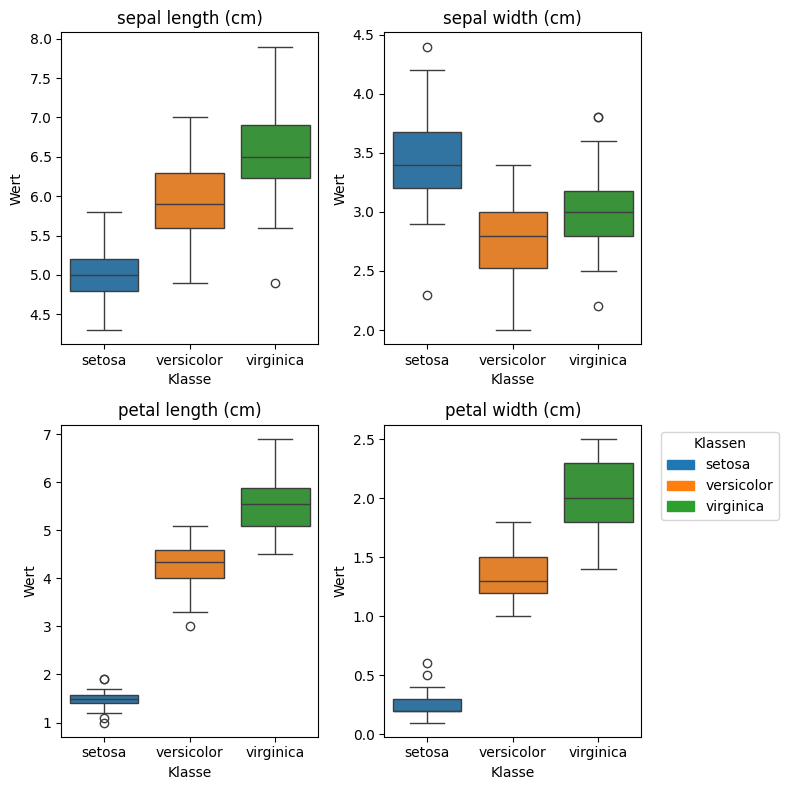

In [29]:
# Farben definieren, die durchgängig verwendet werden:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot erstellen
plt.figure(figsize=(8, 8))

# Für jedes Feature einen Subplot erstellen
for i, feature in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='target', y=feature, data=iris_df,
                hue='target',
                palette=custom_colors,  # Hier werden die custom_colors verwendet
                dodge=False,
                legend=False)  # Legende ausschalten (vermeidet Wiederholungen)

    plt.title(f'{feature}', fontsize=12)
    plt.xlabel('Klasse', fontsize=10)
    plt.ylabel('Wert', fontsize=10)

# Gemeinsame Legende einmalig hinzufügen
handles = [plt.Rectangle((0,0), 1, 1, color=custom_colors[i], label=iris.target_names[i])
           for i in range(3)]
plt.legend(handles=handles, title='Klassen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Pairplots

Der Pairplot visualisiert paarweise Beziehungen und Verteilungen (Hauptdiagonale) aller Variablen in einem Datensatz.

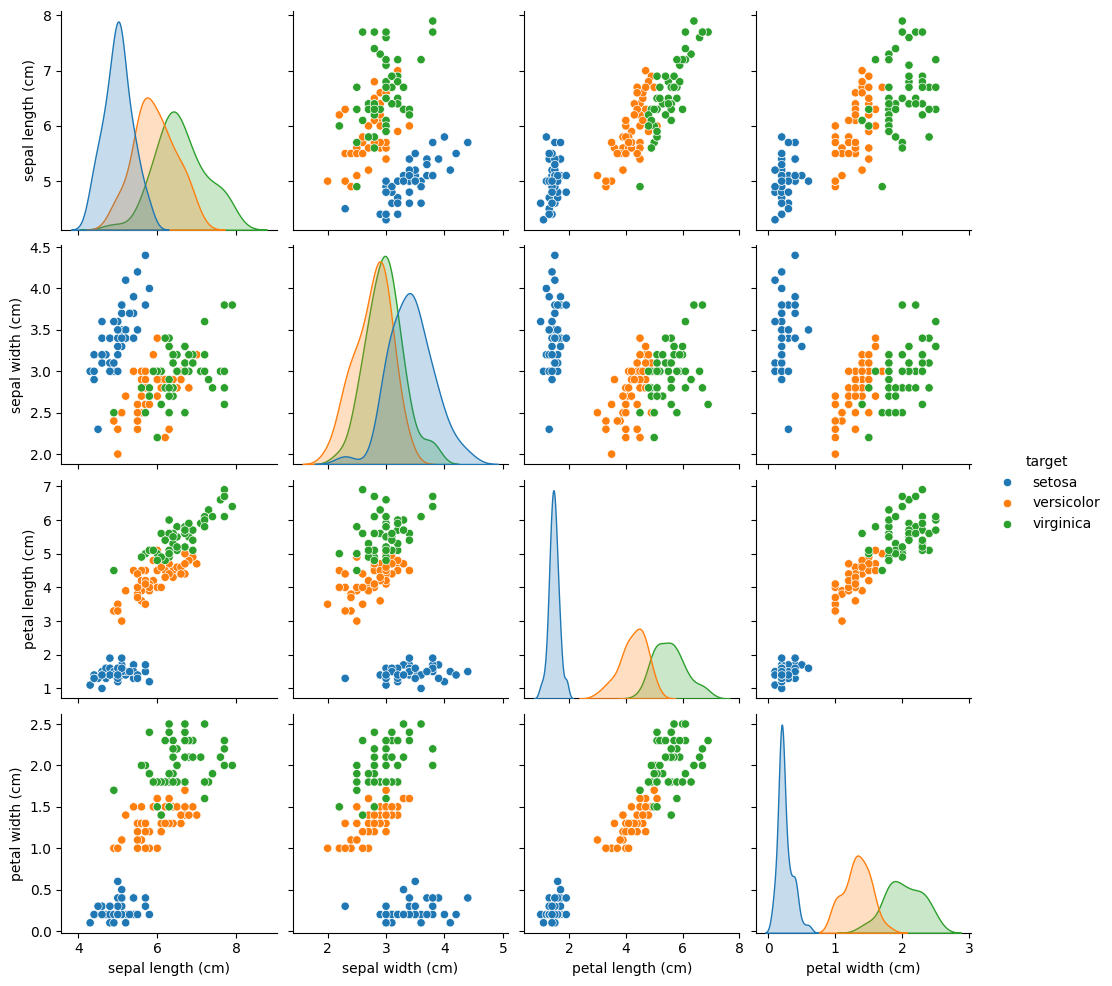

In [30]:
sns.pairplot(iris_df, hue='target')
plt.show()

#### Plot der Daten

Daten in 2D plotten (nur sepal length + sepal width):

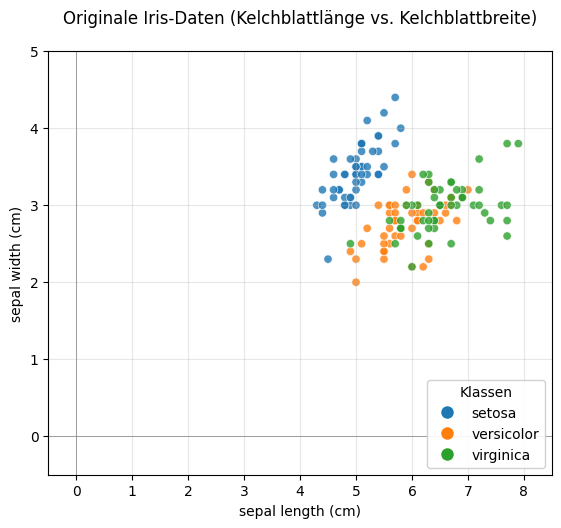

In [31]:
fig_size_x = 6.5
fig_size_y = 5.5

# Farben definieren, die durchgängig verwendet werden:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=[custom_colors[i] for i in y],  # Direkte Farbzuweisung
                     alpha=0.8,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung (0,0) in grau
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)


# Legende manuell erstellen und rechts unten positionieren
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                          markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
plt.legend(handles=legend_elements,
           title="Klassen",
           loc='lower right',  # Position rechts unten
           bbox_to_anchor=(1.0, 0.0),  # Feinjustierung der Position
           framealpha=0.9)  # Leicht transparenter Hintergrund

plt.title('Originale Iris-Daten (Kelchblattlänge vs. Kelchblattbreite)', pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-0.5, 8.5)
plt.ylim(-0.5, 5)
plt.grid(alpha=0.3)
plt.show()

Daten in 3D plotten (sepal length, sepal width und petal length):

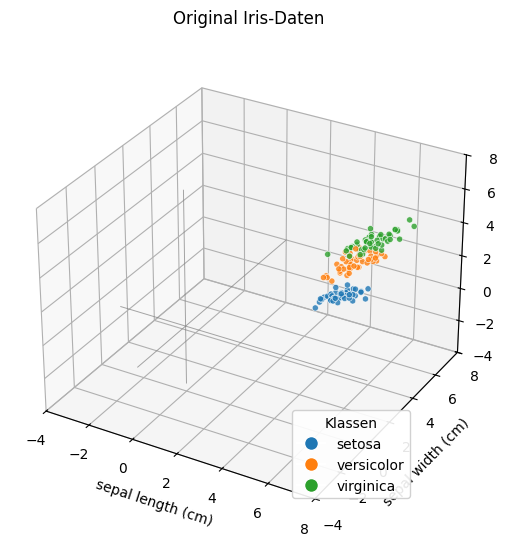

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(fig_size_x, fig_size_y))
ax = fig.add_subplot(111, projection='3d')

# 3D-Scatterplot
scatter = ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],  # Stelle sicher, dass X_scaled mindestens 3 Spalten hat
    c=[custom_colors[i] for i in y],
    alpha=0.8,
    edgecolors='w',
    linewidths=0.5
)

# Achsen durch den Ursprung (0,0,0) - KORRIGIERTE METHODE FÜR 3D
ax.plot([0, 0], [0, 0], [-3.5, 8], color='gray', linestyle='-', linewidth=0.7, alpha=0.7)  # Z-Achse
ax.plot([0, 0], [-3.5, 8], [0, 0], color='gray', linestyle='-', linewidth=0.7, alpha=0.7)  # Y-Achse
ax.plot([-3, 8], [0, 0], [0, 0], color='gray', linestyle='-', linewidth=0.7, alpha=0.7)      # X-Achse

# Legende (wie zuvor)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                  markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
ax.legend(
    handles=legend_elements,
    title="Klassen",
    loc='lower right',
    bbox_to_anchor=(0.85, 0.05),
    framealpha=0.9
)

# Titel & Achsen
plt.title('Original Iris-Daten', pad=20)
ax.set_xlabel(X_names[0])
ax.set_ylabel(X_names[1])
ax.set_zlabel(X_names[2])  # Stelle sicher, dass X_names mindestens 3 Einträge hat

# Achsenlimits
ax.set_xlim(-4, 8)
ax.set_ylim(-4, 8)
ax.set_zlim(-4, 8)

ax.grid(alpha=0.3)
plt.tight_layout()  # Verhindert Überlappungen
plt.show()

## **Principal Component Analysis durchführen**

### **Schritt 1: Daten zentrieren und standardisieren**


Bevor wir die Hauptkomponentenanalyse durchführen, zentrieren und standardisieren wir die Daten. Dabei werden alle Veriablen so transformiert, dass sie einen Mittelwert von 0 und eine Varianz von 1 haben.

Die Zentrierung ist wichtig für die Aussagekraft der PCA. Ohne Zentrierung würde die erste Hauptkomponente auf die Mitte der Daten zeigen.

Die standardisierung wird gemacht, damit alle Variablen gleich gewichtet in die Analyse eingehen.

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=X_names).head(n=20).to_markdown(floatfmt=".3f"))

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|
|  0 |              -0.901 |              1.019 |              -1.340 |             -1.315 |
|  1 |              -1.143 |             -0.132 |              -1.340 |             -1.315 |
|  2 |              -1.385 |              0.328 |              -1.397 |             -1.315 |
|  3 |              -1.507 |              0.098 |              -1.283 |             -1.315 |
|  4 |              -1.022 |              1.249 |              -1.340 |             -1.315 |
|  5 |              -0.537 |              1.940 |              -1.170 |             -1.052 |
|  6 |              -1.507 |              0.789 |              -1.340 |             -1.184 |
|  7 |              -1.022 |              0.789 |              -1.283 |             -1.315 |
|  8 |              -1.749 |             -0.362 |              -1.340 

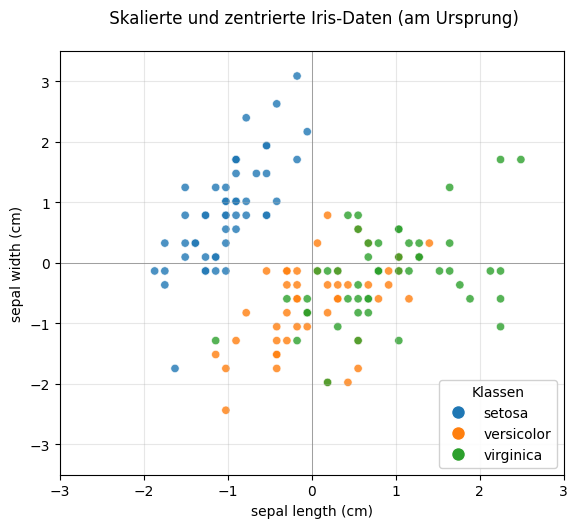

In [34]:
plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=[custom_colors[i] for i in y],  # Direkte Farbzuweisung
                     alpha=0.8,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung (0,0) in grau
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)


# Legende manuell erstellen und rechts unten positionieren
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                          markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
plt.legend(handles=legend_elements,
           title="Klassen",
           loc='lower right',  # Position rechts unten
           bbox_to_anchor=(1.0, 0.0),  # Feinjustierung der Position
           framealpha=0.9)  # Leicht transparenter Hintergrund

plt.title(' Skalierte und zentrierte Iris-Daten (am Ursprung)', pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-3, 3)
plt.ylim(-3.5, 3.5)
plt.grid(alpha=0.3)
plt.show()

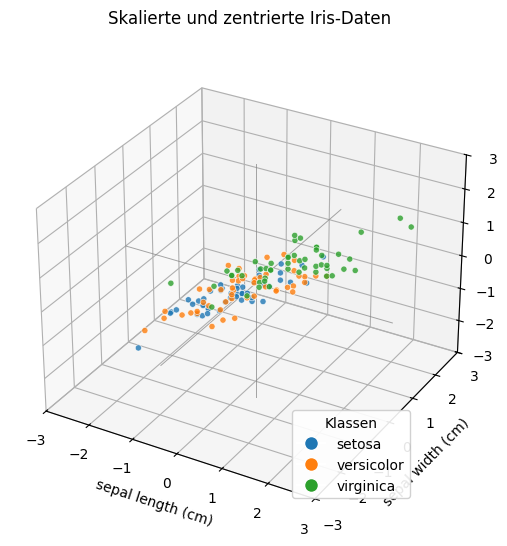

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(fig_size_x, fig_size_y))
ax = fig.add_subplot(111, projection='3d')

# 3D-Scatterplot
scatter = ax.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    X_scaled[:, 2],  # Stelle sicher, dass X_scaled mindestens 3 Spalten hat
    c=[custom_colors[i] for i in y],
    alpha=0.8,
    edgecolors='w',
    linewidths=0.5
)

# Achsen durch den Ursprung (0,0,0) - KORRIGIERTE METHODE FÜR 3D
ax.plot([0, 0], [0, 0], [-3.5, 3.5], color='gray', linestyle='-', linewidth=0.7, alpha=0.7)  # Z-Achse
ax.plot([0, 0], [-3.5, 3.5], [0, 0], color='gray', linestyle='-', linewidth=0.7, alpha=0.7)  # Y-Achse
ax.plot([-3, 3], [0, 0], [0, 0], color='gray', linestyle='-', linewidth=0.7, alpha=0.7)      # X-Achse

# Legende (wie zuvor)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                  markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
ax.legend(
    handles=legend_elements,
    title="Klassen",
    loc='lower right',
    bbox_to_anchor=(0.85, 0.05),
    framealpha=0.9
)

# Titel & Achsen
plt.title('Skalierte und zentrierte Iris-Daten', pad=20)
ax.set_xlabel(X_names[0])
ax.set_ylabel(X_names[1])
ax.set_zlabel(X_names[2])  # Stelle sicher, dass X_names mindestens 3 Einträge hat

# Achsenlimits
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

ax.grid(alpha=0.3)
plt.tight_layout()  # Verhindert Überlappungen
plt.show()

### **Schritt 2: Kovarianz-Matrix, Eigenwerte und Eigenvektoren**

#### **Kovarianzmatrix**

Die Kovarianzmatrix beschreibt die linearen Beziehungen zwischen den einzelnen Variablen. Sie zeigt uns, wie stark zwei Variabeln gemeinsam variieren, also ob sie tendenziell gleichzeitig hohe oder niedrige Werte annehmen.

In der PCA wird die Kovarianzmatrix benötigt, um die Richtungen größter Varianz zu finden.

In [36]:
# Kovarianzmatrix berechnen
cov_matrix = np.cov(X_scaled.T)

print("Kovarianzmatrix-Form:", cov_matrix.shape)

Kovarianzmatrix-Form: (4, 4)


Bei vier Variablen hat die Kovarianzmatrix die Dimension 4×4, wobei die Diagonalelemente die Varianzen der einzelnen Variablen und die Nicht-Diagonalelemente die Kovarianzen zwischen den Variablenpaaren darstellen.

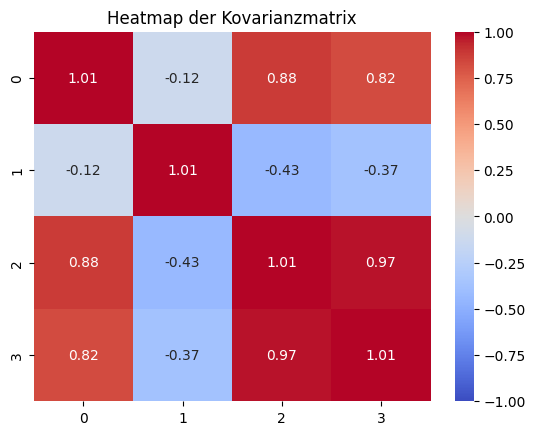

In [37]:
# Kovarianzmatrix plotten
sns.heatmap(
    cov_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,       # Werte als Text anzeigen
    fmt=".2f",        # Format: 2 Nachkommastellen
    annot_kws={"size": 10},  # Schriftgröße der Annotationen
    vmin=-1,  # Untergrenze der Colorbar
    vmax=1    # Obergrenze der Colorbar
)
plt.title("Heatmap der Kovarianzmatrix")
plt.show()

#### **Eigenwerte und Eigenvektoren**


Wir berechnen nun die Eigenwerte und Eigenvektoren der Kovarianzmatrix. Die Eigenwerte geben an, wie viel Varianz jeweils durch eine Hauptkomponente erklärt wird. Die Eigenvektoren sind die Richtungen dieser Hauptkomponenten.

Basierend auf der Kovarianzmatrix lassen sich die Eigenwerte und und Eigenvektoren berechnen. Diese helfen dabei, Richtungen mit der größten Varianz in den Daten zu identifizieren.

Die **Eigenvektoren** definieren die Richtungen der neuen Hauptkomponentenachsen im ursprünglichen Merkmalsraum. Jeder Eigenvektor zeigt in die **Richtung der maximalen Varianz** für die entsprechende Hauptkomponente.

Die **Elemente eines Eigenvektors** zeigen an, wie stark jede der ursprünglichen Variablen zu der neuen Hauptkomponente beiträgt. Wenn ein Element eines Eigenvektors groß ist, bedeutet dies, dass die entsprechende ursprüngliche Variable einen starken Einfluss auf diese Hauptkomponente hat.

Die **Eigenwerte** geben die Varianz der Daten entlang der neuen Hauptkomponentenachsen an. Ein großer Eigenwert zeigt an, dass die zugehörige Hauptkomponente eine große Menge an Varianz in den Daten erklärt.

##### Eigenwerte und Eigenvektoren berechnen

In [38]:
# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

Wir möchten die Eigenvektoren bzw. Hauptkomponenten identifizieren, die den größten Anteil an Varianz in den Daten erklären. Dazu sortieren wir die Eigenwerte nach absteigender größe.

In [39]:
# Eigenwerte absteigend sortieren
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

num_av_components = len(eigenvectors)

print(eigenvectors)

[[-0.52106591  0.37741762  0.71956635  0.26128628]
 [ 0.26934744  0.92329566 -0.24438178 -0.12350962]
 [-0.5804131   0.02449161 -0.14212637 -0.80144925]
 [-0.56485654  0.06694199 -0.63427274  0.52359713]]


##### Richtungen der Eigenvektoren plotten

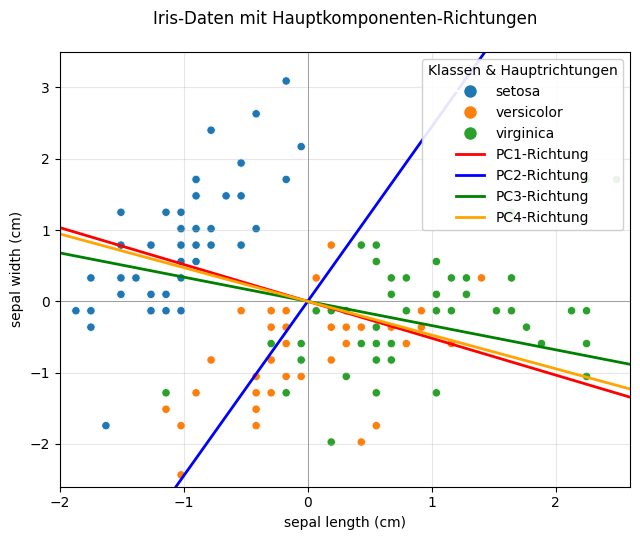

In [40]:
plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=[custom_colors[i] for i in y],
                     alpha=1,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)

# Eigenvektoren als durchgehende Linien
pc_colors = ['red', 'blue', 'green', 'orange']
xlim = plt.xlim()
ylim = plt.ylim()

for i, vec in enumerate(eigenvectors.T[:4]):
    slope = vec[1]/vec[0]
    x_vals = np.array([xlim[0], xlim[1]])
    y_vals = slope * x_vals
    plt.plot(x_vals, y_vals,
             color=pc_colors[i], linewidth=2, alpha=1,
             linestyle='-')

# Legende oben rechts
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                  markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
legend_elements.extend([
    Line2D([0], [0], color='red', lw=2, linestyle='-', label='PC1-Richtung'),
    Line2D([0], [0], color='blue', lw=2, linestyle='-', label='PC2-Richtung'),
    Line2D([0], [0], color='green', lw=2, linestyle='-', label='PC3-Richtung'),
    Line2D([0], [0], color='orange', lw=2, linestyle='-', label='PC4-Richtung')
])

plt.legend(handles=legend_elements,  # Korrigiert: "handles" statt "handles"
           title="Klassen & Hauptrichtungen",
           loc='upper right',  # Oben rechts
           bbox_to_anchor=(1.0, 1.0),  # Ankerpunkt oben rechts
           framealpha=0.9)

plt.title('Iris-Daten mit Hauptkomponenten-Richtungen', pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-2, 2.6)
plt.ylim(-2.6, 3.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

##### Richtungen der Eigenvektoren mit Varianzanteil plotten

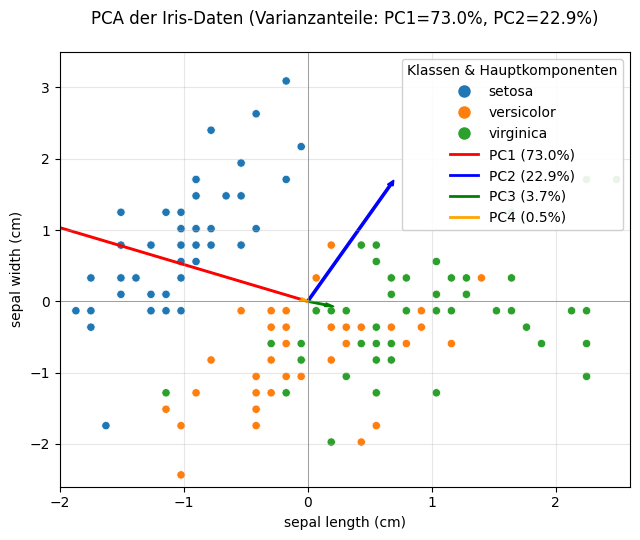

In [41]:
plt.figure(figsize=(fig_size_x, fig_size_y))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=[custom_colors[i] for i in y],
                     alpha=1,
                     edgecolors='w',
                     linewidths=0.5)

# Koordinatenachsen durch Ursprung
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)

# Berechne Varianzanteile in %
total_var = sum(eigenvalues)
var_percent = [val/total_var * 100 for val in eigenvalues]

# Eigenvektoren mit Eigenwert-Skalierung als Pfeile
pc_colors = ['red', 'blue','green','orange']
origin = np.array([0, 0])  # Ursprungspunkt

for i, (vec, val) in enumerate(zip(eigenvectors.T[:4], eigenvalues)):
    scaled_vec = vec * val * 2  # Skaliere mit Eigenwert
    plt.arrow(origin[0], origin[1],
              scaled_vec[0], scaled_vec[1],
              color=pc_colors[i],
              width=0.02,
              head_width=0.05,
              length_includes_head=True,
              alpha=1)

# Legende mit Varianzprozenten
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                  markerfacecolor=custom_colors[i], markersize=10) for i in range(3)]
legend_elements.extend([
    Line2D([0], [0], color='red', lw=2, label=f'PC1 ({var_percent[0]:.1f}%)'),
    Line2D([0], [0], color='blue', lw=2, label=f'PC2 ({var_percent[1]:.1f}%)'),
    Line2D([0], [0], color='green', lw=2, label=f'PC3 ({var_percent[2]:.1f}%)'),
    Line2D([0], [0], color='orange', lw=2, label=f'PC4 ({var_percent[3]:.1f}%)')
])

plt.legend(handles=legend_elements,
           title="Klassen & Hauptkomponenten",
           loc='upper right',
           bbox_to_anchor=(1.0, 1.0),
           framealpha=0.9)

plt.title('PCA der Iris-Daten (Varianzanteile: PC1={:.1f}%, PC2={:.1f}%)'.format(var_percent[0], var_percent[1]),
          pad=20)
plt.xlabel(X_names[0])
plt.ylabel(X_names[1])
plt.xlim(-2, 2.6)
plt.ylim(-2.6, 3.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Schritt 3: Ladungs-Matrix**

#### Ladungsmatrix als Tabelle anzeigen

In [42]:
# Berechnungen
explained_variance = eigenvalues
variance_ratio = eigenvalues / eigenvalues.sum() * 100

# Ladungstabelle erstellen
loadings = pd.DataFrame(
    eigenvectors,
    index=X_names,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)

# Varianz-Informationen als neue Zeilen hinzufügen
loadings.loc['---'] = ['---'] * len(loadings.columns)  # Trennzeile
loadings.loc['Erklärte Varianz'] = explained_variance
loadings.loc['Anteil (%)'] = variance_ratio


## Loadings Tabelle ausgeben #####
print(loadings.to_markdown(floatfmt=".3f"))

|                   | PC1                 | PC2                  | PC3                  | PC4                  |
|:------------------|:--------------------|:---------------------|:---------------------|:---------------------|
| sepal length (cm) | -0.5210659146701198 | 0.37741761556456793  | 0.7195663527008161   | 0.2612862799524543   |
| sepal width (cm)  | 0.26934744250594334 | 0.923295659540715    | -0.2443817795143996  | -0.12350961958551984 |
| petal length (cm) | -0.5804130957962946 | 0.024491609085586008 | -0.14212636933390188 | -0.8014492463359884  |
| petal width (cm)  | -0.5648565357793615 | 0.0669419869680582   | -0.6342727371109239  | 0.5235971345661894   |
| ---               | ---                 | ---                  | ---                  | ---                  |
| Erklärte Varianz  | 2.9380850501999958  | 0.9201649041624863   | 0.14774182104494726  | 0.02085386217646262  |
| Anteil (%)        | 72.9624454132999    | 22.850761786701746   | 3.6689218892828577   | 0.5178

#### Ladungsmatrix als Heatmap plotten

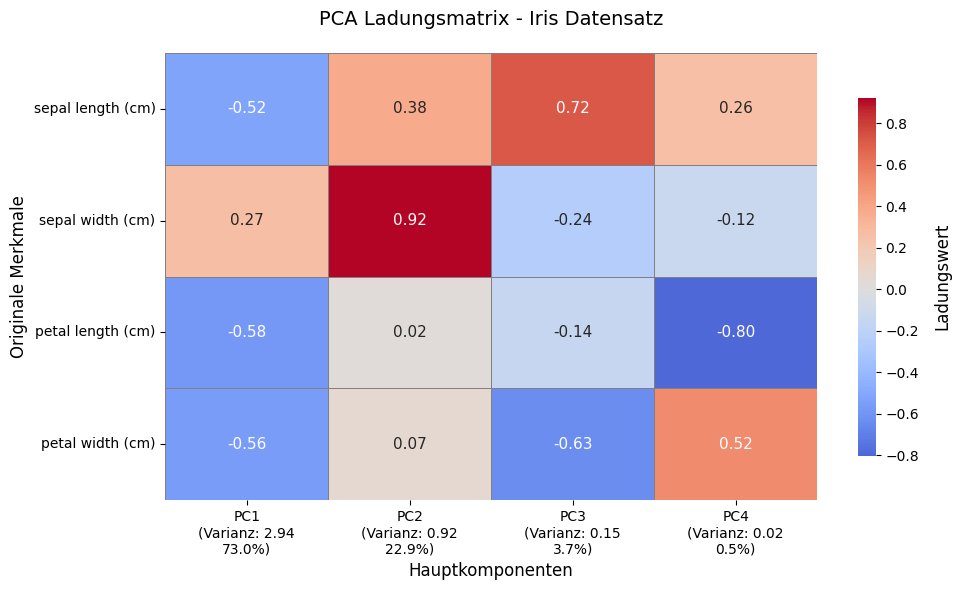

In [43]:
# Daten vorbereiten
heatmap_data = pd.DataFrame(
    eigenvectors,
    index=X_names,
    columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])]
)

# Heatmap mit transponierter Darstellung
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data,  # Nicht transponiert (da wir Achsen manuell anpassen)
                 annot=True,
                 cmap='coolwarm',
                 center=0,
                 fmt=".2f",
                 linewidths=0.5,
                 linecolor='gray',
                 cbar_kws={'label': 'Ladungswert', 'shrink': 0.8},
                 annot_kws={"size": 11})

# Achsen und Titel anpassen
plt.title('PCA Ladungsmatrix - Iris Datensatz', pad=20, fontsize=14)
plt.xlabel('Hauptkomponenten', fontsize=12)  # PCs jetzt oben
plt.ylabel('Originale Merkmale', fontsize=12)  # Features links
plt.xticks(rotation=0)  # Horizontale Beschriftung für PCs

# Farbbalken optimieren
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Ladungswert', fontsize=12, labelpad=10)

# Varianz-Informationen als zusätzliche X-Achsen-Beschriftung
pc_labels = [f'{col}\n(Varianz: {var:.2f}\n{ratio:.1f}%)'
            for col, var, ratio in zip(heatmap_data.columns, explained_variance, variance_ratio)]
ax.set_xticklabels(pc_labels)

plt.tight_layout()
plt.show()

### **Schritt 4: Wahl der Hauptkomponenten**

#### Scree Plot

Ein Scree-Plot zeigt die Eigenwerte in absteigender Reihenfolge. So erkennt man, wie viel Varianz jede Komponente erklärt.

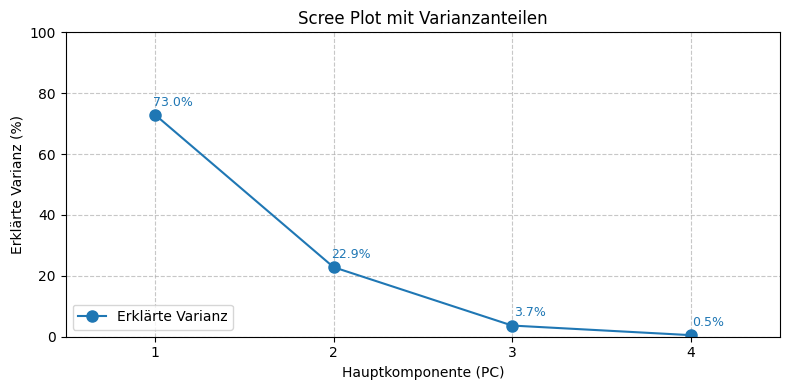

In [44]:
plt.figure(figsize=(8, 4))

# Berechne erklärte Varianz in %
explained_variance = eigenvalues[:num_av_components] / np.sum(eigenvalues[:num_av_components]) * 100

# Plot mit Prozentangaben (unverändert)
plt.plot(np.arange(1, num_av_components+1), explained_variance, 'o-', markersize=8,
         label='Erklärte Varianz', color='tab:blue')

# Werte an den Punkten anzeigen
for i, var in enumerate(explained_variance):
    plt.text(i+1.1, var+2, f'{var:.1f}%',  # +2 für leichten Abstand über dem Punkt
             ha='center', va='bottom',    # Zentrierte Ausrichtung
             fontsize=9, color='tab:blue')

# Rest des unveränderten Codes
plt.xlabel('Hauptkomponente (PC)')
plt.ylabel('Erklärte Varianz (%)')
plt.title('Scree Plot mit Varianzanteilen')
plt.xticks(np.arange(1, num_av_components+1))
plt.xlim(0.5, num_av_components + 0.5)
plt.ylim(0, 100)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

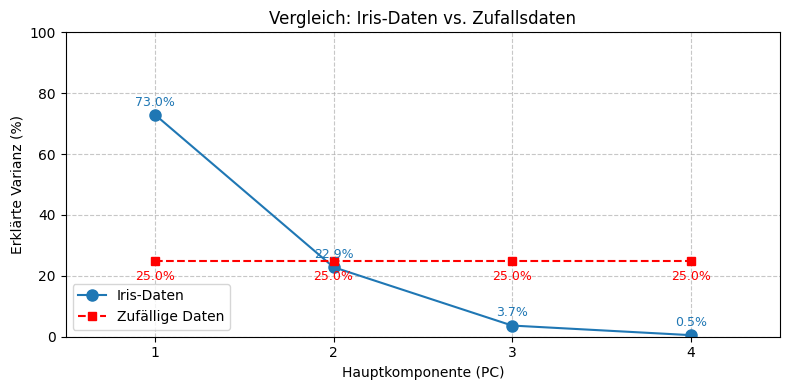

In [45]:
plt.figure(figsize=(8, 4))

# Berechne erklärte Varianz in %
explained_variance = eigenvalues[:num_av_components] / np.sum(eigenvalues[:num_av_components]) * 100

# Theoretische Varianz für zufällige Daten (gleichmäßige Verteilung)
random_variance = [100/num_av_components] * num_av_components

# Plot mit Prozentangaben
plt.plot(np.arange(1, num_av_components+1), explained_variance, 'o-', markersize=8,
         label='Iris-Daten', color='tab:blue')

# Zufällige Daten als rot gestrichelte Linie
plt.plot(np.arange(1, num_av_components+1), random_variance, 's--',
         label='Zufällige Daten', color='red', markersize=6)

# Werte an den Punkten anzeigen (Iris-Daten)
for i, var in enumerate(explained_variance):
    plt.text(i+1, var+2, f'{var:.1f}%',
             ha='center', va='bottom',
             fontsize=9, color='tab:blue')

# Werte für zufällige Daten anzeigen
for i, var in enumerate(random_variance):
    plt.text(i+1, var-3, f'{var:.1f}%',
             ha='center', va='top',
             fontsize=9, color='red')

# Restliche Einstellungen
plt.xlabel('Hauptkomponente (PC)')
plt.ylabel('Erklärte Varianz (%)')
plt.title('Vergleich: Iris-Daten vs. Zufallsdaten')
plt.xticks(np.arange(1, num_av_components+1))
plt.xlim(0.5, num_av_components + 0.5)
plt.ylim(0, 100)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

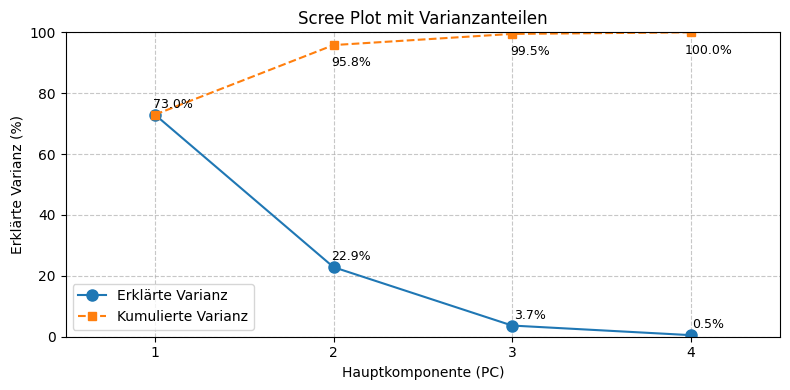

In [46]:
plt.figure(figsize=(8, 4))

# Berechne erklärte Varianz in %
explained_variance = eigenvalues[:num_av_components] / np.sum(eigenvalues[:num_av_components]) * 100

# Plot mit Prozentangaben
plt.plot(np.arange(1, num_av_components+1), explained_variance, 'o-', markersize=8,
         label='Erklärte Varianz', color='tab:blue')

# Kumulierte Varianz als gestapelte Linie
cumulative_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, num_av_components+1), cumulative_variance, 's--',
         label='Kumulierte Varianz', color='tab:orange')

# Beschriftungen
plt.xlabel('Hauptkomponente (PC)')
plt.ylabel('Erklärte Varianz (%)')
plt.title('Scree Plot mit Varianzanteilen')
plt.xticks(np.arange(1, num_av_components+1))
plt.xlim(0.5, num_av_components + 0.5)

# Grid und Legende
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='best')

# Werte direkt an den Punkten anzeigen (optional)
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    plt.text(i+1.1, ev+2.2, f'{ev:.1f}%', ha='center', fontsize=9)
    if i > 0:  # Vermeide Überlappung beim ersten Punkt
        plt.text(i+1.1, cv-7, f'{cv:.1f}%', ha='center', fontsize=9)

plt.ylim(0, 100)  # Y-Achse von 0 bis 100
plt.tight_layout()
plt.show()

Wenn die Hauptkomponenten bekannt sind, muss entschieden werden, wieviele davon herangezogen werden sollen um die Daten zu beschreiben. In diesem Schritt findet die eigentliche Dimesionsreduktion statt. Dabei muss berücksichtigt werden, dass mit der Dimensionsreduktion auch immer ein Informationsverlust einhergeht.

Ein zuverlässiges Kriterium ist die kumulierte Varianz. Dabei wird geschaut, wieviele Hauptkomponenten benötigt werden um 90% bzw 95% der Varianz in den Daten zu beschreiben.

#### Kumulierte Varianz

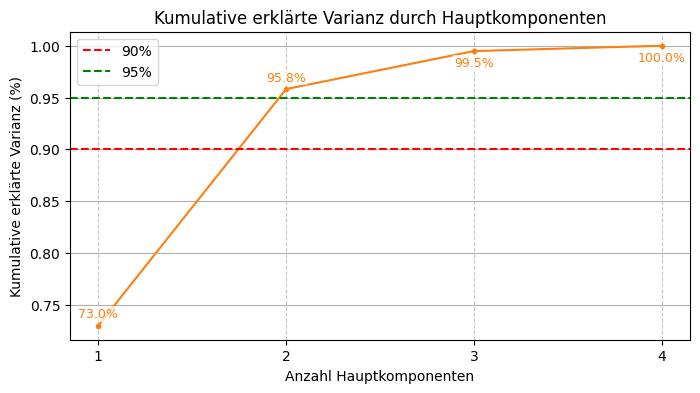

In [47]:
# Kumulierte erklärte Varianz berechnen
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot der kumulierten Varianz
plt.figure(figsize=(8, 4))

plt.plot(np.arange(1, len(cumulative_variance) + 1),
         cumulative_variance,
         linestyle='-',  # Durchgezogene Linie (Standard)
         linewidth=1.5,   # Etwas dickere Linie für bessere Sichtbarkeit
         marker='o',         # Punkte hinzufügen
         markersize=3,       # Größe der Punkte
         color='tab:orange'
)

# Beschriftung der Punkte mit positionierter Ausrichtung
for i, cum_var in enumerate(cumulative_variance):
    if i < 2:  # PC1 und PC2 (i=0,1)
        y_offset = 0.005  # Oberhalb des Punkts
        va = 'bottom'
    else:      # PC3 und PC4 (i=2,3)
        y_offset = -0.005  # Unterhalb des Punkts
        va = 'top'

    plt.text(i+1, cum_var + y_offset,
             f'{cum_var:.1%}',
             ha='center',
             va=va,
             fontsize=9,
             color='tab:orange',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))


plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%')
plt.xlabel('Anzahl Hauptkomponenten')
plt.xticks(np.arange(1, len(eigenvalues)+1))
plt.ylabel('Kumulative erklärte Varianz (%)')
plt.title('Kumulative erklärte Varianz durch Hauptkomponenten')
plt.legend()

# Grid nur bei den X-Ticks
plt.grid(True, axis='y')  # Horizontale Gridlines immer
plt.grid(True, axis='x', which='major', linestyle='--', alpha=0.7)  # Nur bei Haupt-Ticks
plt.show()

In [48]:
# Komponentenanzahl für 90 % bzw. 95 % Varianz bestimmen
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Anzahl Komponenten für 90% erklärte Varianz: {n_90}")
print(f"Anzahl Komponenten für 95% erklärte Varianz: {n_95}")

Anzahl Komponenten für 90% erklärte Varianz: 2
Anzahl Komponenten für 95% erklärte Varianz: 2


### **Schritt 5: Projektion der Daten**


Die standardisierten Daten werden nun auf die gewählten Hauptkomponenten projiziert. Dadurch erhalten wir eine Darstellung der Daten in einem neuen Merkmalsraum mit reduzierter Dimensionalität. Mathematisch wird dies durch Matrixmultiplikation mit den ausgewählten Eigenvektoren umgesetzt.

In [49]:
num_components = n_95; # n_90 bei 90% erklaerter Varianz

print("Skalierte Daten:",X_scaled.shape)
print("Gewählte Eigenvektoren:",eigenvectors[:, :num_components].shape,"\n")

# Projektion der Daten durch Matrix-Multiplikation der
# skalierten Daten mit der Matrix der gewählten Hauptkomponenten
X_pca = X_scaled.dot(eigenvectors[:, :num_components])

print("Projizierte Datenform:", X_pca.shape)


n_components = X_pca.shape[1]

# in dataframe umwandeln
X_pca_df = pd.DataFrame(
    data = X_pca,
    columns = [f"PC{i+1}" for i in range(n_components)])

# Die ersten 15 Zeilen der projizierten Daten ausgeben
print(X_pca_df.head(15).to_markdown(floatfmt=".3f"))

Skalierte Daten: (150, 4)
Gewählte Eigenvektoren: (4, 2) 

Projizierte Datenform: (150, 2)
|    |   PC1 |    PC2 |
|---:|------:|-------:|
|  0 | 2.265 |  0.480 |
|  1 | 2.081 | -0.674 |
|  2 | 2.364 | -0.342 |
|  3 | 2.299 | -0.597 |
|  4 | 2.390 |  0.647 |
|  5 | 2.076 |  1.489 |
|  6 | 2.444 |  0.048 |
|  7 | 2.233 |  0.223 |
|  8 | 2.335 | -1.115 |
|  9 | 2.184 | -0.469 |
| 10 | 2.166 |  1.044 |
| 11 | 2.326 |  0.133 |
| 12 | 2.218 | -0.729 |
| 13 | 2.633 | -0.962 |
| 14 | 2.199 |  1.860 |


## **Visualisierung der projizierten Daten**

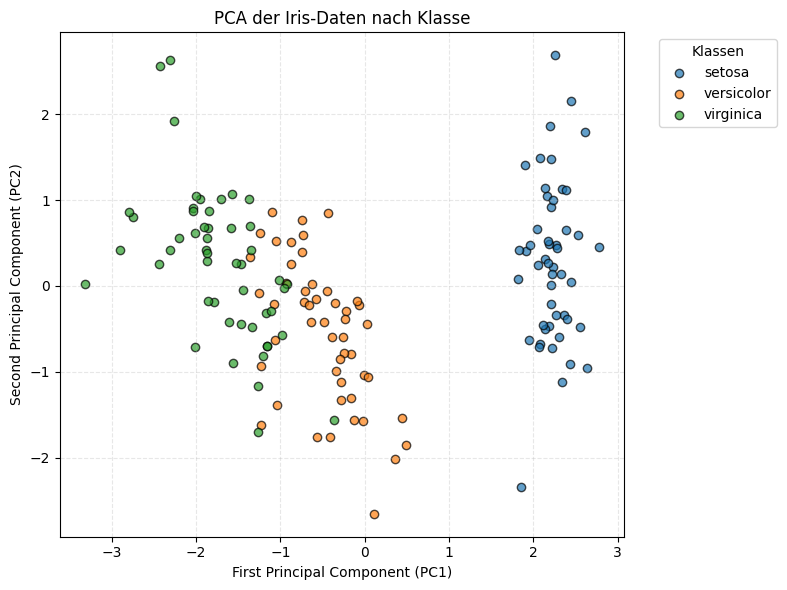

In [50]:
target_names = iris.target_names

# Plot erstellen
plt.figure(figsize=(8, 6))

# Scatter-Plot mit Farben nach Klasse und Legenden-Labels
for class_id, class_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == class_id, 0],  # PC1 für diese Klasse
        X_pca[y == class_id, 1],  # PC2 für diese Klasse
        label=class_name,
        alpha=0.7,
        edgecolor='k'
    )

# Titel und Achsen
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA der Iris-Daten nach Klasse')
plt.grid(True, linestyle='--', alpha=0.3)

# Legende statt Colorbar
plt.legend(title="Klassen", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Verhindert Überlappungen
plt.show()